In [66]:
import pandas as pd
import numpy as np
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from time import time

In [25]:
%matplotlib inline

In [26]:
# Read data, use your own path
df = pd.read_csv("../data/data.csv")

In [27]:
# Have a glimpse at the data
df.head(5)

,0,2,5,7,8,9,11,14,16,17,...,55,56,57,58,59,60,62,63,64,label
0,null,0,nsubj,g,query_yn,def,0,nsubj,f,explain,...,1,xcomp,root,xcomp_root,80,49,0,0,0,-1
1,null,0,dobj,f,query_yn,pro,0,nsubj,f,reply_w,...,0,ccomp,root,ccomp_root,85,56,0,0,0,-1
2,def,0,prep_to,g,query_w,indef,0,prep_beside,f,check,...,1,prep_in,root,prep_in_root,1,1,0,0,0,-1
3,pro,0,prep_above,f,reply_w,def,0,prep_at,g,align,...,1,prep_about,root,prep_about_root,353,217,0,0,0,1
4,def,0,pobj,f,query_yn,def,0,prep_over,f,acknowledge,...,1,root,root,root_root,3,2,0,0,0,-1


In [28]:
# Data stats
df.describe()

,2,11,27,28,29,30,31,32,33,34,...,52,53,54,55,59,60,62,63,64,label
count,126837.000000,126837.000000,126837.000000,126837.000000,126837,126837.000000,126837,126837,126837.000000,126837.000000,...,126837.000000,126837.000000,126837.000000,126837.000000,126837.000000,126837.000000,126837.000000,126837.000000,126837.000000,126837.000000
mean,0.004257,0.002759,0.258615,0.321034,1,0.993298,1,1,0.100365,0.993298,...,0.005905,0.001009,0.330274,0.813170,119.139917,77.993330,0.028304,0.021997,0.000662,-0.121849
std,0.065110,0.052458,0.437876,0.466876,0,0.081588,0,0,0.300487,0.081588,...,0.076618,0.031752,0.470314,0.389777,127.803014,82.071603,0.165841,0.146673,0.025726,0.992553
min,0.000000,0.000000,0.000000,0.000000,1,0.000000,1,1,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,-3.000000,-1.000000,0.000000,0.000000,0.000000,-1.000000
25%,0.000000,0.000000,0.000000,0.000000,1,1.000000,1,1,0.000000,1.000000,...,0.000000,0.000000,0.000000,1.000000,24.000000,16.000000,0.000000,0.000000,0.000000,-1.000000
50%,0.000000,0.000000,0.000000,0.000000,1,1.000000,1,1,0.000000,1.000000,...,0.000000,0.000000,0.000000,1.000000,78.000000,52.000000,0.000000,0.000000,0.000000,-1.000000
75%,0.000000,0.000000,1.000000,1.000000,1,1.000000,1,1,0.000000,1.000000,...,0.000000,0.000000,1.000000,1.000000,166.900000,110.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1,1.000000,1,1,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,694.000000,435.000000,1.000000,1.000000,1.000000,1.000000


In [29]:
# Data shape
print df.shape

(126837, 53)


In [30]:
# Separate labels from input vectors
df_y = df['label'].copy()
del df['label']

In [31]:
# Get list of columns
df_cols = list(df.columns.values)
print len(df_cols)

52


In [32]:
# Print the number of values each column takes
for col in df_cols:
    print "*****column: ", col
    print pd.value_counts(df[col].values)

*****column:  0
def        59038
indef      25712
null       20714
pro        10182
dctc        3589
poss        2751
el          2037
dem         1453
numpro       564
num          435
relpro       175
demnum        94
posspro       93
dtype: int64
*****column:  2
0    126297
1       540
dtype: int64
*****column:  5
dobj                    36616
prep_of                 14731
nsubj                   12404
root                     8131
pobj                     6863
prep_to                  4590
nn                       3789
dep                      3766
prep_above               3447
prep_below               3044
prep_from                2278
conj_and                 2262
prep_underneath          2262
prep_towards             1992
prep_at                  1313
ccomp                    1236
prep_between             1129
prep_with                1074
prep_past                1070
prep_in                  1042
prep_under                927
advmod                    890
xcomp                

In [33]:
# These two columns are the only continous numerical columns, do some analysis on them
# How many values do they take?
print "col 59 num vals=", len(pd.value_counts(df['59'].values))
print "col 60 num vals=", len(pd.value_counts(df['60'].values))

col 59 num vals= 1569
col 60 num vals= 411


In [34]:
# Real numerical column 59 stats
df['59'].describe()

count    126837.000000
mean        119.139917
std         127.803014
min          -3.000000
25%          24.000000
50%          78.000000
75%         166.900000
max         694.000000
Name: 59, dtype: float64

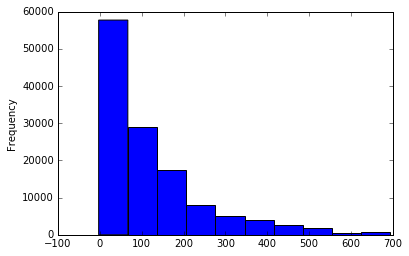

In [35]:
df['59'].plot(kind='hist')

In [36]:
# Real numerical column 60 stats
df['60'].describe()

count    126837.000000
mean         77.993330
std          82.071603
min          -1.000000
25%          16.000000
50%          52.000000
75%         110.000000
max         435.000000
Name: 60, dtype: float64

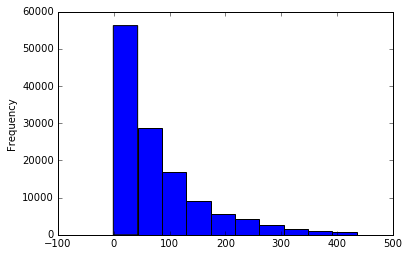

In [37]:
df['60'].plot(kind='hist')

In [38]:
# Print the number of values each columns take. Mostly we have:
# Binary columns, columns with 3 values, categorical and two continuous values columns (59 and 60)
for col in df_cols:
    print "*****column: ", col, " num vals=", len(pd.value_counts(df[col].values))

*****column:  0  num vals= 13
*****column:  2  num vals= 2
*****column:  5  num vals= 112
*****column:  7  num vals= 2
*****column:  8  num vals= 13
*****column:  9  num vals= 13
*****column:  11  num vals= 2
*****column:  14  num vals= 112
*****column:  16  num vals= 2
*****column:  17  num vals= 13
*****column:  18  num vals= 142
*****column:  20  num vals= 4
*****column:  23  num vals= 2838
*****column:  25  num vals= 4
*****column:  26  num vals= 137
*****column:  27  num vals= 2
*****column:  28  num vals= 2
*****column:  29  num vals= 1
*****column:  30  num vals= 2
*****column:  31  num vals= 1
*****column:  32  num vals= 1
*****column:  33  num vals= 2
*****column:  34  num vals= 2
*****column:  35  num vals= 1
*****column:  36  num vals= 2
*****column:  37  num vals= 2
*****column:  38  num vals= 3
*****column:  39  num vals= 3
*****column:  40  num vals= 3
*****column:  41  num vals= 3
*****column:  42  num vals= 3
*****column:  43  num vals= 3
*****column:  44  num vals= 3
*

In [39]:
# Delete columns that have no variance (all 0's or all 1's)
cols_to_delete = ['29', '31', '32', '35']
for col in cols_to_delete:
    del df[col]

In [56]:
# Normalize the continuous columns
df['59'] = (df['59'] - df['59'].mean()) / (df['59'].std())
df['60'] = (df['60'] - df['60'].mean()) / (df['60'].std())

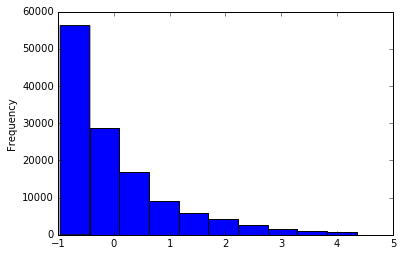

In [60]:
df['59'].describe()
df['60'].plot(kind='hist')

In [61]:
df['60'].describe()

count    1.268370e+05
mean    -1.681401e-16
std      1.000000e+00
min     -9.624928e-01
25%     -7.553566e-01
50%     -3.167153e-01
75%      3.899847e-01
max      4.349941e+00
Name: 60, dtype: float64

In [40]:
# Convert categorical to one-hot sparse columns
df_one_hot = pd.get_dummies(df)

In [41]:
df_one_hot.shape

(126837, 5590)

In [43]:
# Get a glimpse of how the new data look like
df_one_hot.head(2)

,2,11,27,28,30,33,34,36,37,38,...,58_xcomp_prep_until,58_xcomp_prep_with,58_xcomp_prepc_below,58_xcomp_prepc_beneath,58_xcomp_prepc_from,58_xcomp_prepc_of,58_xcomp_prepc_to,58_xcomp_rcmod,58_xcomp_root,58_xcomp_xcomp
0,0,0,0,0,1,1,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,0,0,0,0,1,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [47]:
feature_list = df_one_hot.columns.values

In [50]:
print len(feature_list)

5590


# Classification

In [71]:
ada_tree = AdaBoostClassifier(DecisionTreeClassifier(max_depth=1),
                             algorithm="SAMME.R",
                             n_estimators=100)

In [72]:
t_start = time()
print t_start

1460313783.34


In [ ]:
ada_tree.fit(df_one_hot, df_y)
t_finish = time()
print 'AdaBoost took %f' %(t_finish-t_start)

In [70]:
ada_tree.score(df_one_hot, df_y)

0.82031268478440833